 **Nama : jazila Siti Sarmila**

**NIM  : H081211034**

**Linear Regression**
 merupakan model Machine Learning yang digunakan untuk memprediksi nilai Numerik ( Angka ) berdasarkan satu atau lebih variabel prediktor dengan mengasumsikan bahwa ada hubungan linier antara variabel prediktor dan variabel target.

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


dataset = pd.read_csv('/content/SwedishMotorInsurance.csv')
dataset

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1.0,1.0,1.0,1.0,455.13,108.0,392491
1,1.0,1.0,1.0,2.0,69.17,19.0,46221
2,1.0,1.0,1.0,3.0,72.88,13.0,15694
3,1.0,1.0,1.0,4.0,1292.39,124.0,422201
4,1.0,NaN,1.0,5.0,191.01,40.0,119373
...,...,...,...,...,...,...,...
2177,5.0,7.0,7.0,5.0,8.74,0.0,0
2178,5.0,7.0,7.0,6.0,16.61,0.0,0
2179,5.0,7.0,7.0,7.0,2.83,1.0,966
2180,5.0,7.0,7.0,8.0,13.06,0.0,0


Dalam Regresi Sedderhana, garis regresi dinyatakan dalam bentuk persamaan linear sebagai berikut:
**y = b0 + b1*x**

**Variabel data yang akan digunakan pada regresi linear sederhana ini adalah daya claims sebagai data Y dan dan Payment sebagai variabel x.**

1. Hitung rata-rata variabel dependen (Y) dan variabel independen (X):

In [7]:
mean_Y = dataset['Claims'].mean()
mean_X = dataset['Payment'].mean()

Mengisi data yang kosong dengan median dari data

In [10]:
dataset['Claims'] = dataset['Claims'].fillna(mean_Y)

dataset['Payment'] = dataset['Payment'].fillna(mean_X)

print(dataset)


      Kilometres  Zone  Bonus  Make  Insured  Claims  Payment
0            1.0   1.0    1.0   1.0   455.13   108.0   392491
1            1.0   1.0    1.0   2.0    69.17    19.0    46221
2            1.0   1.0    1.0   3.0    72.88    13.0    15694
3            1.0   1.0    1.0   4.0  1292.39   124.0   422201
4            1.0   NaN    1.0   5.0   191.01    40.0   119373
...          ...   ...    ...   ...      ...     ...      ...
2177         5.0   7.0    7.0   5.0     8.74     0.0        0
2178         5.0   7.0    7.0   6.0    16.61     0.0        0
2179         5.0   7.0    7.0   7.0     2.83     1.0      966
2180         5.0   7.0    7.0   8.0    13.06     0.0        0
2181         5.0   7.0    7.0   9.0   384.87    16.0   112252

[2182 rows x 7 columns]


Hitung deviasi variabel dependen dan variabel independen dari rata-rata:

In [11]:
dataset['deviasi_Y'] = dataset['Claims'] - mean_Y
dataset['deviasi_X'] = dataset['Payment'] - mean_X

2. Hitung kovarians antara variabel dependen dan variabel independen:

In [12]:
covariance = (dataset['deviasi_Y'] * dataset['deviasi_X']).sum()

3. Hitung varians dari variabel independen:

In [13]:
variance_X = (dataset['deviasi_X']**2).sum()

4. Hitung koefisien regresi (b1):

In [14]:
b1 = covariance / variance_X

5. Hitung titik potong sumbu Y (b0):

In [15]:
b0 = mean_Y - b1 * mean_X

**Menggambar grafik Linear regressinnya**

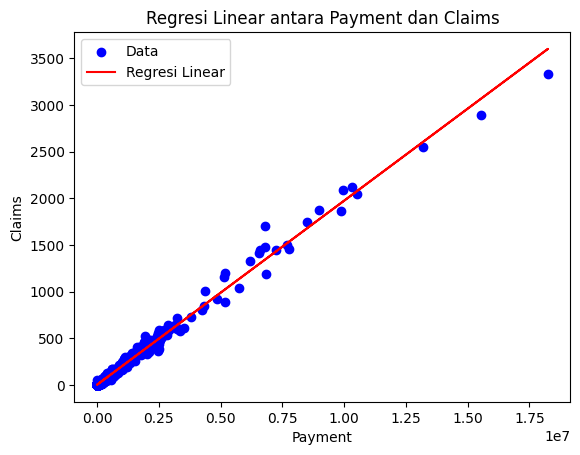

In [17]:
plt.scatter(dataset['Payment'], dataset['Claims'], color='blue', label='Data')
plt.plot(dataset['Payment'], b0 + b1 * dataset['Payment'], color='red', label='Regresi Linear')

plt.xlabel('Payment')
plt.ylabel('Claims')
plt.title('Regresi Linear antara Payment dan Claims')
plt.legend()

plt.show()

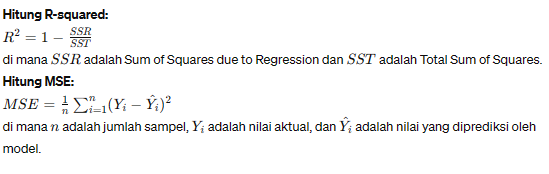


In [18]:
# Hitung SSR (Sum of Squares due to Regression)
SSR = ((b1 * dataset['Payment'] + b0 - mean_Y)**2).sum()

# Hitung SST (Total Sum of Squares)
SST = (dataset['deviasi_Y']**2).sum()

# Hitung R-squared
R_squared = 1 - (SSR / SST)

# Hitung jumlah sampel
n = len(dataset)

# Hitung Mean Squared Error (MSE)
MSE = ((dataset['Claims'] - (b0 + b1 * dataset['Payment']))**2).sum() / n

print("Koefisien Determinasi (R-squared):", R_squared)
print("Mean Squared Error (MSE):", MSE)

Koefisien Determinasi (R-squared): 0.009206575117632787
Mean Squared Error (MSE): 374.4080463558328


**Koefisien Determinasi (R-squared): 0.009206575117632787**
Koefisien determinasi (R-squared) mengukur seberapa baik garis regresi linear cocok dengan data aktual. Nilai R-squared berkisar antara 0 dan 1, di mana semakin mendekati 1, semakin baik model regresi linear sesuai dengan data. Dalam kasus ini, nilai R-squared sangat rendah, yaitu sekitar 0.0092. Ini menunjukkan bahwa hanya sekitar 0.92% variabilitas dari variabel dependen (Claims) yang dapat dijelaskan oleh variabel independen (Payment). Sebagian besar variabilitas masih tidak dapat dijelaskan oleh model regresi linear.

**Mean Squared Error (MSE): 374.4080463558328**
Mean Squared Error (MSE) mengukur rata-rata dari kuadrat perbedaan antara nilai aktual (Claims) dan nilai yang diprediksi oleh model. Semakin rendah nilai MSE, semakin baik modelnya. Dalam kasus ini, MSE cukup tinggi, yaitu sekitar 374.41. Ini menunjukkan bahwa model cenderung memiliki kesalahan yang besar dalam memprediksi nilai Claims berdasarkan Payment.